For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy
import matplotlib.pyplot as plt
import numpy as np

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
import random
#Generate 20 random numbers between 0 and 20
x = random.sample(range(0,21), 21)
print(x)
print(len(x))

[16, 7, 2, 0, 5, 12, 15, 6, 11, 13, 8, 14, 4, 3, 17, 1, 18, 10, 9, 19, 20]
21


In [3]:
a=-2
b=1
y=[]
for i in range(0,21):
    y.append(a*x[i]+b)
print(y)    
print(len(y))

[-31, -13, -3, 1, -9, -23, -29, -11, -21, -25, -15, -27, -7, -5, -33, -1, -35, -19, -17, -37, -39]
21


#### Plot your data points. 

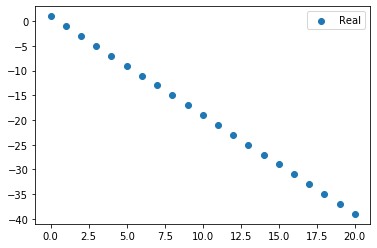

In [4]:
plt.scatter(x,y,label='Real')

plt.legend()
plt.show()  

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

In [20]:
th0=0 #theta0
th1=0 #theta1
alpha=0.0001 #learning rate 

#######################################

#func to calcolate Hypothesis
def hypo(o1,o2,arr):
    h=[]
    for i in range (0,len(arr)):
        h.append(o1 + o2 *arr[i])
    return h    

#func to calculate error
def err(o1,o2,arr1,arr2):
    r=[]
    h=hypo(o1,o2,arr1)
    for i in range (0,len(arr1)):
        r.append((h[i]-arr2[i])**2)
    return r

#func to calculate h(x)-y(x)
def hminy(o1,o2,arr1,arr2):
    h=hypo(o1,o2,arr1)
    r=[]
    for i in range (0,len(arr1)):
        r.append(h[i]-arr2[i])
    return r

#func to calculate (h(x)-y(x))*x
def hminymulx(o1,o2,arr1,arr2):
    h=hypo(o1,o2,arr1)
    r=[]
    for i in range (0,len(arr1)):
        r.append((h[i]-arr2[i])*arr1[i])
    return r
    
    
    
####################################################


#here cost function
def cost(arr):
    sm=0
    sm = numpy.sum(arr)
    #print('cost funtion equal ',(1/(2*len(arr)))*sm) 
    return (1/(2*len(arr)))*sm



In [37]:
#Adarad fuunction of Epsilon = 10^-8
# 100 epochs

def Adagrad(thm0,thm1,inp,out,lrm,eps,epochs):
    #here calculate the optimum value  for theta0 and theta1 
    #sm0= numpy.sum(hminy)
    #sm1=numpy.sum(hminymulx)
    #mag0=(alpha*(1/len(hminy))*sm0)
    #mag1=(alpha*(1/len(hminy))*sm1)
    arrth0=[]
    arrth1=[]
    vt0=0
    vt1=0
    tloss=[]
    reg=[]
    
    for i in range (0,epochs):
        
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
        ernew=err(thm0,thm1,inp,out)
        tloss.append(cost(ernew))
        print('cost funcyion is ',' ',cost(ernew))
        
        ft0=hminy(thm0,thm1,inp,out)    
        sm0= numpy.sum(ft0)   
        grad0=(1/len(ft0))*sm0
        vt0=vt0+(grad0**2)
        thm0=thm0-((lrm/(np.sqrt(vt0)+eps))*grad0)
        arrth0.append(thm0)
        
        
        ft1=hminymulx(thm0,thm1,inp,out)    
        sm1= numpy.sum(ft1)   
        grad1=(1/len(ft1))*sm1
        vt1=vt1+(grad1**2)
        thm1=thm1-((lrm/(np.sqrt(vt1)+eps))*grad1)
        arrth1.append(thm1)
        y1new=hypo(thm0,thm1,inp)
        #reg.append(y1new)
    
        
        print(thm0,'  ',thm1)
        
        #ernew=err(thm0,thm1,inp,out)
        #tloss.append(cost(ernew))

    return thm0 , thm1 , y1new , reg , arrth0 , arrth1 , tloss

In [63]:
thm0ada , thm1ada , y1mnewada , regmada , arrayth0ada , arrayth1ada , lossada = Adagrad(0,0,x,y,0.1,(10**-8),1000)


cost funcyion is    253.83333333333331
-0.09999999994736843    -0.09999999999618805
cost funcyion is    226.38833333522334
-0.1685723098877286    -0.1686948046955425
cost funcyion is    208.45070095370988
-0.2234689268797518    -0.2237453050829775
cost funcyion is    194.61369783597655
-0.27026939483693696    -0.27071407707121237
cost funcyion is    183.18623889425257
-0.311562429999856    -0.31218437074595135
cost funcyion is    173.38598487713818
-0.3487957711484262    -0.3496016240227799
cost funcyion is    164.77646614144766
-0.38287513004871493    -0.38387040449375787
cost funcyion is    157.08523364757085
-0.41441145444225036    -0.41560101991380566
cost funcyion is    150.12890130953184
-0.44383984257591785    -0.44522817703413176
cost funcyion is    143.77714217276798
-0.47148313610744025    -0.4730744602751034
cost funcyion is    137.9334557560063
-0.4975887066398634    -0.49938706197850424
cost funcyion is    132.52405404370393
-0.522351066163477    -0.5243603629118478
cost f

-1.5232693235098438    -1.8027762137519747
cost funcyion is    0.8649335696589935
-1.522680178749902    -1.802903058262684
cost funcyion is    0.864391130216506
-1.5220903179662657    -1.8030290627201266
cost funcyion is    0.863850773395471
-1.5214997509554276    -1.8031542360773913
cost funcyion is    0.8633124595347398
-1.5209084874069565    -1.8032785871905168
cost funcyion is    0.8627761498259487
-1.520316536904656    -1.8034021248195462
cost funcyion is    0.8622418062951223
-1.5197239089277095    -1.803524857629569
cost funcyion is    0.8617093917846723
-1.519130612851813    -1.8036467941917518
cost funcyion is    0.8611788699357831
-1.5185366579502964    -1.803767942984358
cost funcyion is    0.8606502051711813
-1.5179420533952321    -1.8038883123937568
cost funcyion is    0.8601233626782789
-1.5173468082585322    -1.8040079107154194
cost funcyion is    0.8595983083926665
-1.5167509315130323    -1.8041267461549075
cost funcyion is    0.8590750089819825
-1.516154432033566    -1

In [64]:
from sklearn.metrics import r2_score

smada = r2_score(y,y1mnewada)

print(smada)

0.991139688551341


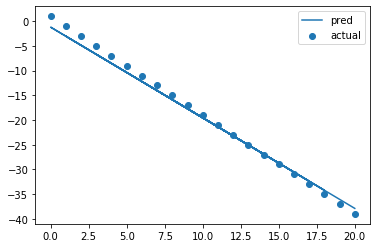

In [143]:
plt.scatter(x,y,label='actual')
plt.plot(x,y1mnewada,label='pred')
plt.legend()
plt.show()

In [65]:
print('All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions')
print()
print(regmada)

All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1.6999999998863773, -0.7999999999206848, -0.2999999999397445, -0.09999999994736843, -0.5999999999283087, -1.2999999999016252, -1.5999999998901893, -0.6999999999244968, -1.199999999905437, -1.3999999998978132, -0.8999999999168729, -1.4999999998940012, -0.49999999993212063, -0.3999999999359326, -1.7999999998825653, -0.1999999999435565, -1.8999999998787533, -1.099999999909249, -0.9999999999130609, -1.9999999998749414, -2.0999999998711294], [-2.8676891850164083, -1.349435942756526, -0.5059619192788136, -0.1685723098877286, -1.012046333365441, -2.192909966234238, -2.698994380320866, -1.1807411380609834, -2.024215161538696, -2.3616047709297807, -1.5181307474520684, -2.5302995756253233, -0.8433515286698985, -0.6746567239743559, -3.036383989711951, -0.3372671145832711, -3.2050787944074934, -1.8555203568431535, -1.686825552147611, -3.373773599103

In [66]:
print('Final Optimum values of Theta_0 and Theta_1. :')
print()
print('theta_0 = ',thm0ada,'   ','theta_1 = ',thm0ada)

Final Optimum values of Theta_0 and Theta_1. :

theta_0 =  -1.1986637747720617     theta_1 =  -1.1986637747720617


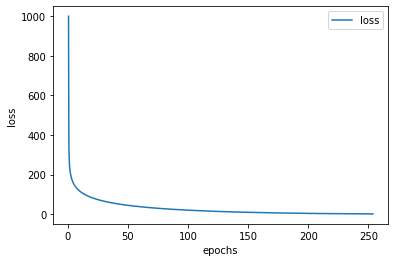

In [67]:
#loss-epochs

list_n = np.arange(1, 1001).tolist()


plt.plot(lossada,list_n,label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

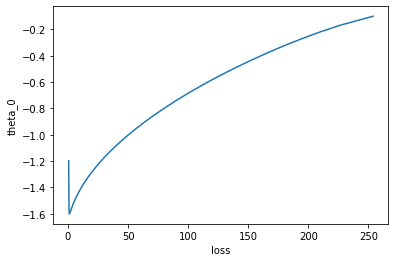

In [68]:
#loss-theta0

plt.plot(lossada,arrayth0ada)
plt.ylabel('theta_0')
plt.xlabel('loss')
#plt.legend()
plt.show()  

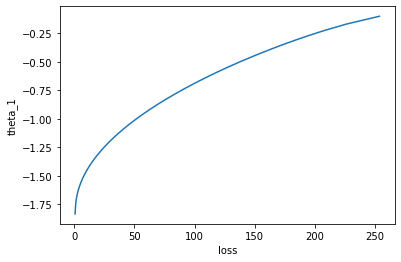

In [69]:
#loss-theta1


plt.plot(lossada,arrayth1ada)
plt.ylabel('theta_1')
plt.xlabel('loss')
#plt.legend()
plt.show()    

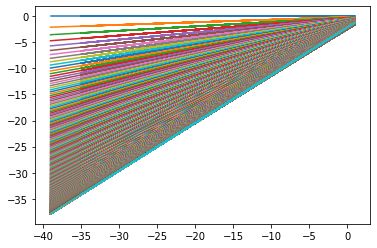

In [70]:
# all fitted lines per epoch (single graph)


   
for i in range (0,len(regmada)):
    plt.plot(y,regmada[i])
    
    
plt.show()
    

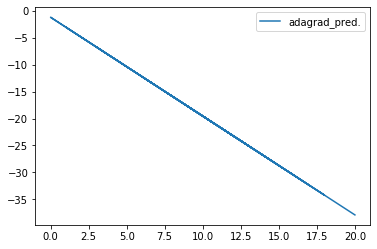

In [141]:
plt.plot(x,y1mnewada,label='adagrad_pred.')

plt.legend()
plt.show()  

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

![image.png](attachment:image.png)

In [102]:
def RMSPROP(thm0,thm1,inp,out,lrm,eps,epochs,beta):
    
    #here calculate the optimum value  for theta0 and theta1 
    #sm0= numpy.sum(hminy)
    #sm1=numpy.sum(hminymulx)
    #mag0=(alpha*(1/len(hminy))*sm0)
    #mag1=(alpha*(1/len(hminy))*sm1)
    arrth0=[]
    arrth1=[]
    vt0=0
    vt1=0
    tloss=[]
    reg=[]
    
    for i in range (0,epochs):
        
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
        ernew=err(thm0,thm1,inp,out)
        tloss.append(cost(ernew))
        print('cost funstion is :' ,cost(ernew))
        
        ft0=hminy(thm0,thm1,inp,out)    
        sm0= numpy.sum(ft0)   
        grad0=(1/len(ft0))*sm0
        vt0=(beta*vt0)+((1-beta)*(grad0**2))
        thm0=thm0-((lrm/(np.sqrt(vt0)+eps))*grad0)
        arrth0.append(thm0)
        
        
        ft1=hminymulx(thm0,thm1,inp,out)    
        sm1= numpy.sum(ft1)   
        grad1=(1/len(ft1))*sm1
        vt1=(beta*vt1)+((1-beta)*(grad1**2))
        thm1=thm1-((lrm/(np.sqrt(vt1)+eps))*grad1)
        arrth1.append(thm1)
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
    
        
        print(thm0,'  ',thm1)
        
        #ernew=err(thm0,thm1,inp,out)
        #tloss.append(cost(ernew))

    return thm0 , thm1 , y1new , reg , arrth0 , arrth1 ,  tloss

In [109]:
thm0rms , thm1rms , y1mnewrms , regmrms , arrayth0rms , arrtayh1rms , lossrms = RMSPROP(0,0,x,y,0.1,(10**-8),1000,0.9)


cost funstion is : 253.83333333333331
-0.31622776549052223    -0.3162277659784018
cost funstion is : 172.4350274110875
-0.522573559087451    -0.5238747941143684
cost funstion is : 127.57864064005432
-0.6825877983395076    -0.6856920361702322
cost funstion is : 97.34053604295698
-0.8151529506238859    -0.8204405371699643
cost funstion is : 75.31288435720194
-0.928724021558917    -0.9365587116562383
cost funstion is : 58.627811132080495
-1.0278815197524758    -1.0386416266672938
cost funstion is : 45.715287606091806
-1.1153987596405874    -1.1294907438160766
cost funstion is : 35.604782230235564
-1.1930817067279849    -1.2109480117327325
cost funstion is : 27.644789954478995
-1.2621690870396731    -1.284293577788513
cost funstion is : 21.370986709595485
-1.3235457184196402    -1.3504578176571262
cost funstion is : 16.43720097288989
-1.3778664868798314    -1.4101443510363256
cost funstion is : 12.576339969019454
-1.425633599803678    -1.463906380482025
cost funstion is : 9.576934092821949

cost funstion is : 0.19708332585383198
0.9500000018490141    -2.0499999989795534
cost funstion is : 0.19708332483310143
1.0499999982182175    -1.9500000009770162
cost funstion is : 0.1970833251885682
0.9500000015856832    -2.04999999921999
cost funstion is : 0.19708332674113416
1.0499999987276085    -1.9500000004790166
cost funstion is : 0.1970833291207293
0.9500000009378934    -2.04999999986713
cost funstion is : 0.19708333184311297
1.0499999993879767    -1.9499999998076722
cost funstion is : 0.19708333440712433
0.950000000379254    -2.050000000443885
cost funstion is : 0.1970833363799013
1.0499999997550151    -1.9499999994176123
cost funstion is : 0.19708333746943554
0.9500000002500363    -2.0500000005951726
cost funstion is : 0.19708333756041288
1.0499999996427931    -1.9499999995110984
cost funstion is : 0.19708333672214817
0.9500000005625652    -2.050000000293769
cost funstion is : 0.19708333517822696
1.0499999992000397    -1.9499999999503883
cost funstion is : 0.19708333325717417

In [110]:
from sklearn.metrics import r2_score

smrms = r2_score(y,y1mnewrms)

print(smrms)

0.997312500014713


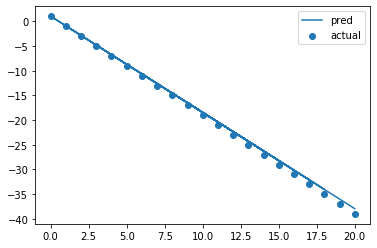

In [144]:
plt.scatter(x,y,label='actual')
plt.plot(x,y1mnewrms,label='pred')
plt.legend()
plt.show()

In [111]:
print('All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions')
print()
print(regmrms)

All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-5.375872021144951, -2.529822127339335, -0.9486832974473258, -0.31622776549052223, -1.8973665953825312, -4.1109609572313435, -5.059644255166549, -2.213594361360933, -3.794733191252942, -4.4271887232097455, -2.8460498933177365, -4.743416489188148, -1.5811388294041295, -1.2649110634257275, -5.692099787123353, -0.632455531468924, -6.008327553101754, -3.47850542527454, -3.162277659296138, -6.324555319080156, -6.640783085058558], [-5.375872021144951, -2.529822127339335, -0.9486832974473258, -0.31622776549052223, -1.8973665953825312, -4.1109609572313435, -5.059644255166549, -2.213594361360933, -3.794733191252942, -4.4271887232097455, -2.8460498933177365, -4.743416489188148, -1.5811388294041295, -1.2649110634257275, -5.692099787123353, -0.632455531468924, -6.008327553101754, -3.47850542527454, -3.162277659296138, -6.324555319080156, -6.640783085

In [112]:
print('Final Optimum values of Theta_0 and Theta_1. :')
print()
print('theta_0 = ',thm0rms,'   ','theta_1 = ',thm0rms)

Final Optimum values of Theta_0 and Theta_1. :

theta_0 =  1.0499999990909084     theta_1 =  1.0499999990909084


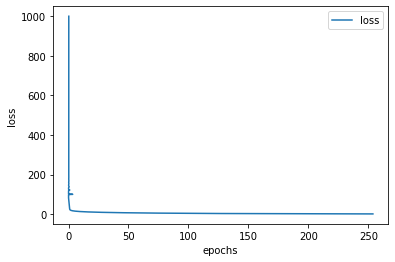

In [113]:
#loss-epochs

list_n = np.arange(1, 1001).tolist()


plt.plot(lossrms,list_n,label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

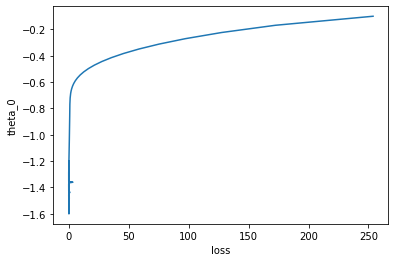

In [114]:
#loss-theta0

plt.plot(lossrms,arrayth0ada)
plt.ylabel('theta_0')
plt.xlabel('loss')
#plt.legend()
plt.show()  

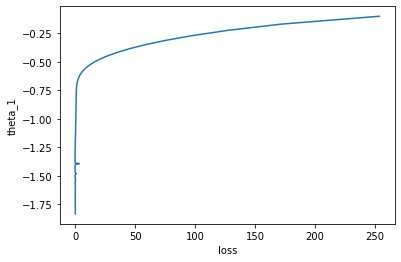

In [116]:
#loss-theta1


plt.plot(lossrms,arrayth1ada)
plt.ylabel('theta_1')
plt.xlabel('loss')
#plt.legend()
plt.show()    

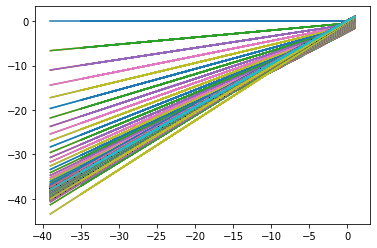

In [117]:
# all fitted lines per epoch (single graph)


   
for i in range (0,len(regmrms)):
    plt.plot(y,regmrms[i])
    
    
plt.show()
    

# Compare RMSprop results with Adagrad results.

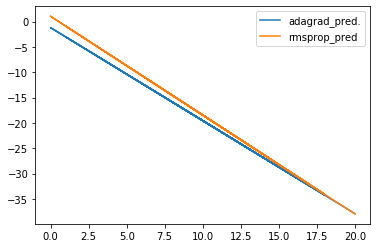

In [147]:
plt.plot(x,y1mnewada,label='adagrad_pred.')
plt.plot(x,y1mnewrms,label='rmsprop_pred')
plt.legend()
plt.show()  

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

![image-4.png](attachment:image-4.png)

In [131]:
def ADAM(thm0,thm1,inp,out,lrm,eps,epochs,beta1,beta2):
    
    #here calculate the optimum value  for theta0 and theta1 
    #sm0= numpy.sum(hminy)
    #sm1=numpy.sum(hminymulx)
    #mag0=(alpha*(1/len(hminy))*sm0)
    #mag1=(alpha*(1/len(hminy))*sm1)
    arrth0=[]
    arrth1=[]
    vt0=0
    vt1=0
    tloss=[]
    reg=[]
    m0=0
    m1=0
    for i in range (1,(epochs+1)):
        
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
        ernew=err(thm0,thm1,inp,out)
        tloss.append(cost(ernew))
        print('cost funtion is ',cost(ernew))
        
        ft0=hminy(thm0,thm1,inp,out)    
        sm0= numpy.sum(ft0)   
        grad0=(1/len(ft0))*sm0
        m0=(beta1*m0)+((1-beta1)*(grad0))
        vt0=(beta2*vt0)+((1-beta2)*(grad0**2))
        
        mtemp0=(m0)/(1-(beta1**i))
        vtemp0=(vt0)/(1-(beta2**i))
        thm0=thm0-((lrm/(np.sqrt(vtemp0)+eps))*mtemp0)
        arrth0.append(thm0)
        
        
        ft1=hminymulx(thm0,thm1,inp,out)    
        sm1= numpy.sum(ft1)   
        grad1=(1/len(ft1))*sm1
        m1=(beta1*m1)+((1-beta1)*(grad1))
        vt1=(beta2*vt1)+((1-beta2)*(grad1**2))
        
        mtemp1=(m1)/(1-(beta1**i))
        vtemp1=(vt1)/(1-(beta2**i))
        thm1=thm1-((lrm/(np.sqrt(vtemp1)+eps))*mtemp1)
        arrth1.append(thm1)
        
        
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
    
        
        print(thm0,'  ',thm1)
        
        #ernew=err(thm0,thm1,inp,out)
        #tloss.append(cost(ernew))

    return thm0 , thm1 , y1new , reg , arrth0 , arrth1 , tloss

In [132]:
thm0adam , thm1adam , y1mnewadam , regmadam , arrayth0adam , arrayth1adam , lossadam = ADAM(0,0,x,y,0.01,(10**-8),1000,0.9,0.99)

cost funtion is  253.83333333333331
-0.00999999999473684    -0.009999999999620108
cost funtion is  251.01788333353224
-0.019998575751784722    -0.01999863101910291
cost funtion is  248.21858323015567
-0.02999477036931903    -0.029994973724783894
cost funtion is  245.43568244273695
-0.03998762427247828    -0.03998810655663887
cost funtion is  242.669425203268
-0.049976177517635514    -0.049977107950620964
cost funtion is  239.9200499309877
-0.059959472072618286    -0.0599610585365657
cost funtion is  237.18778863624095
-0.06993655405517865    -0.06993904329463228
cost funtion is  234.47286635774057
-0.07990647591278519    -0.07991015365400558
cost funtion is  231.77550063712553
-0.08986829852782148    -0.08987348951857148
cost funtion is  229.0959010342257
-0.09982109323350177    -0.09982816120547146
cost funtion is  226.4342686859138
-0.10976394372722569    -0.10977329128381297
cost funtion is  223.79079591087307
-0.11969594786965534    -0.11970801630232523
cost funtion is  221.1656658

cost funtion is  0.4857282592735645
-0.8974599235289574    -1.8579981632916458
cost funtion is  0.48365811643385587
-0.8933977335173213    -1.8583061952168494
cost funtion is  0.4815877117972158
-0.8893263616522021    -1.8586149117123971
cost funtion is  0.4795170906104255
-0.8852458378592539    -1.8589243103286615
cost funtion is  0.4774462982660009
-0.8811561924753321    -1.8592343885853806
cost funtion is  0.47537538029926313
-0.8770574562486769    -1.8595451439717534
cost funtion is  0.47330438238538725
-0.8729496603390531    -1.8598565739465234
cost funtion is  0.4712333503364133
-0.8688328363178452    -1.860168675938055
cost funtion is  0.4691623300982301
-0.8647070161681106    -1.8604814473443991
cost funtion is  0.46709136774753435
-0.8605722322845896    -1.860794885533352
cost funtion is  0.46502050948875834
-0.8564285174736731    -1.8611089878425047
cost funtion is  0.46294980165097066
-0.85227590495333    -1.8614237515792855
cost funtion is  0.46087929068474587
-0.8481144283

In [133]:
from sklearn.metrics import r2_score

smradam = r2_score(y,y1mnewadam)

print(smradam)

0.9999464844107867


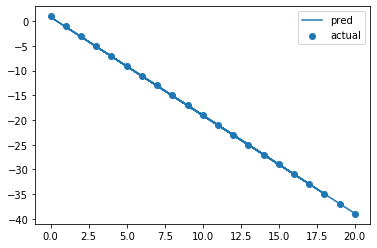

In [145]:
plt.scatter(x,y,label='actual')
plt.plot(x,y1mnewadam,label='pred')
plt.legend()
plt.show()

In [134]:
print('All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions')
print()
print(regmadam)

All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.16999999998865856, -0.0799999999920776, -0.029999999993977056, -0.00999999999473684, -0.05999999999283738, -0.12999999999017814, -0.15999999998903844, -0.06999999999245748, -0.11999999999055803, -0.13999999998979823, -0.08999999999169771, -0.14999999998941835, -0.049999999993217276, -0.039999999993597164, -0.17999999998827867, -0.01999999999435695, -0.18999999998789877, -0.10999999999093792, -0.09999999999131781, -0.19999999998751888, -0.20999999998713897], [-0.16999999998865856, -0.0799999999920776, -0.029999999993977056, -0.00999999999473684, -0.05999999999283738, -0.12999999999017814, -0.15999999998903844, -0.06999999999245748, -0.11999999999055803, -0.13999999998979823, -0.08999999999169771, -0.14999999998941835, -0.049999999993217276, -0.039999999993597164, -0.17999999998827867, -0.01999999999435695, -0.18999999998789877, -0.10999

In [135]:
print('Final Optimum values of Theta_0 and Theta_1. :')
print()
print('theta_0 = ',thm0adam,'   ','theta_1 = ',thm1adam)

Final Optimum values of Theta_0 and Theta_1. :

theta_0 =  0.8289634384382298     theta_1 =  -1.9874276433797973


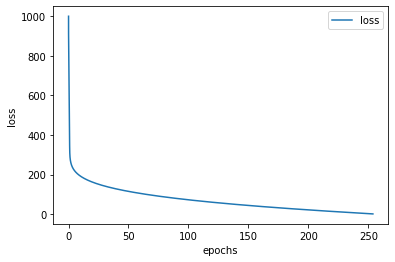

In [136]:
#loss-epochs

list_n = np.arange(1, 1001).tolist()


plt.plot(lossadam,list_n,label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

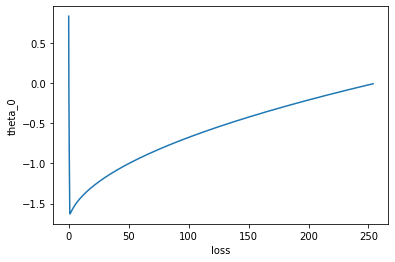

In [137]:
#loss-theta0

plt.plot(lossadam,arrayth0adam)
plt.ylabel('theta_0')
plt.xlabel('loss')
#plt.legend()
plt.show()  

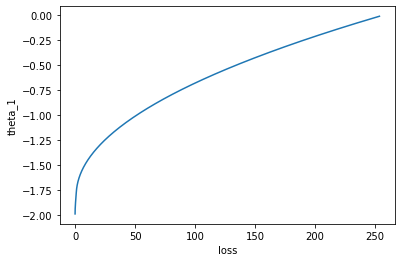

In [138]:
#loss-theta1


plt.plot(lossadam,arrayth1adam)
plt.ylabel('theta_1')
plt.xlabel('loss')
#plt.legend()
plt.show()    

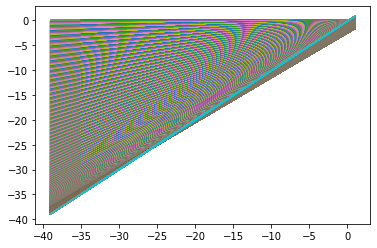

In [139]:
# all fitted lines per epoch (single graph)


   
for i in range (0,len(regmadam)):
    plt.plot(y,regmadam[i])
    
    
plt.show()
    

# Compare Adam results with Adagrad and RMSProp results.

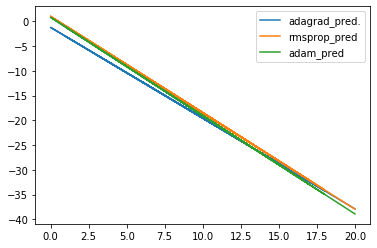

In [151]:
plt.plot(x,y1mnewada,label='adagrad_pred.')
plt.plot(x,y1mnewrms,label='rmsprop_pred')
plt.plot(x,y1mnewadam,label='adam_pred')

plt.legend()
plt.show()  

## Congratulations 
![image.png](attachment:image.png)